In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, shapiro, levene
import seaborn as sns

# Load the dataset
file_path = '2023-10-17-washington-post-police-shootings-export.csv'
df = pd.read_csv(file_path)
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Splitting police departments into separate rows
df['police_department'] = df['police_departments_involved'].str.split(';')
df = df.explode('police_department')

In [37]:
# Filter incidents with no body camera usage
no_body_camera_incidents = df[df['body_camera'] == False]

In [38]:
# Calculate the rate of incidents with no body camera for each police department
department_no_body_camera_rate = df.groupby('police_department')['body_camera'].apply(lambda x: (x == False).sum() / len(x))

# Sort and display the results
sorted_results = department_no_body_camera_rate.sort_values(ascending=False)


In [39]:
print(df.groupby('police_department')['body_camera'].apply(lambda x: (x == False).sum()))

police_department
Abbeville County Sheriff's Office, SC      1
Aberdeen Police Department, WA             1
Abilene Police Department, TX              3
Abington Township Police Department, PA    1
Acadia Parish Sheriff's Office, LA         1
                                          ..
Yuba County Sheriff's Office, CA           5
Yuma County Sheriff's Department, AZ       3
Yuma Police Department, AZ                 3
Zapata County Sheriff's Department, TX     1
Zion Police Department, IL                 3
Name: body_camera, Length: 3325, dtype: int64


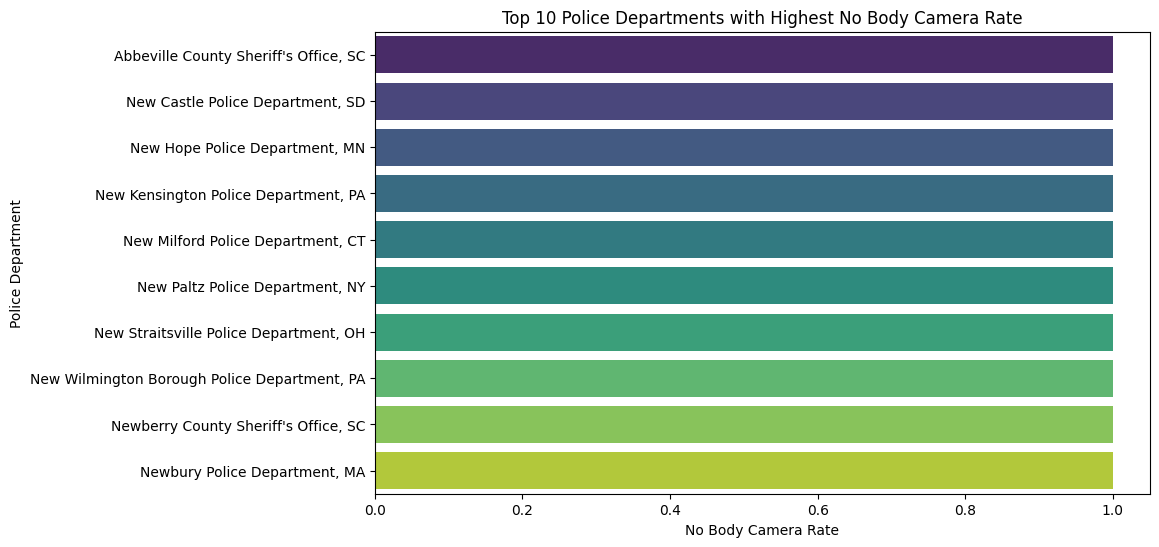

In [40]:
# Plotting the top N police departments
N = 10  # Adjust N based on your preference
top_departments = sorted_results.head(N)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_departments.values, y=top_departments.index, palette='viridis')
plt.title(f'Top {N} Police Departments with Highest No Body Camera Rate')
plt.xlabel('No Body Camera Rate')
plt.ylabel('Police Department')
plt.show()


In [42]:
# Extract state from the 'police_department' column
df['state'] = df['police_department'].str.split(',').str[-1].str.strip()

-- police_department                        state
Abbeville County Sheriff's Office, SC    SC       1.0
Aberdeen Police Department, WA           WA       1.0
Abilene Police Department, TX            TX       1.0
Abington Township Police Department, PA  PA       1.0
Acadia Parish Sheriff's Office, LA       LA       1.0
                                                 ... 
Yuba County Sheriff's Office, CA         CA       1.0
Yuma County Sheriff's Department, AZ     AZ       1.0
Yuma Police Department, AZ               AZ       1.0
Zapata County Sheriff's Department, TX   TX       1.0
Zion Police Department, IL               IL       1.0
Name: body_camera, Length: 3364, dtype: float64


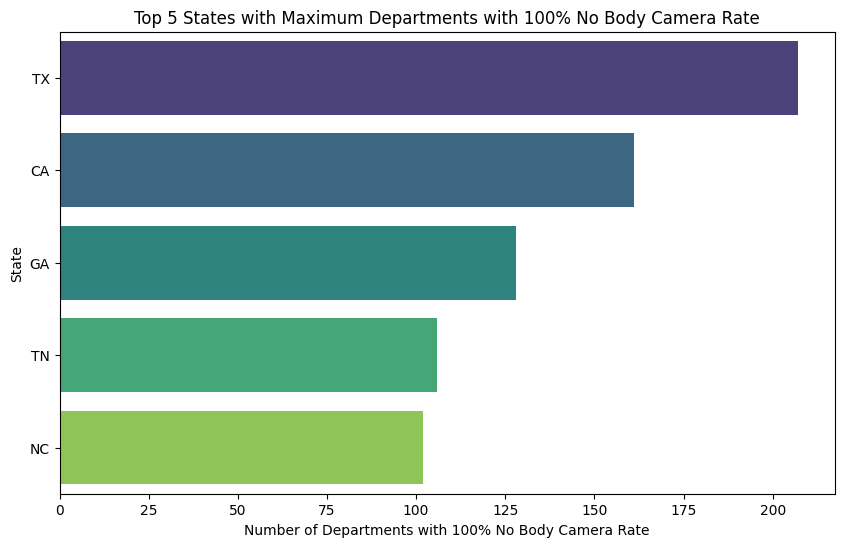

Top 5 States with Maximum Departments:
state
TX    207
CA    161
GA    128
TN    106
NC    102
Name: police_department, dtype: int64


In [43]:
# Group by police department and state, calculate the rate of incidents with no body camera
department_no_body_camera_rate = no_body_camera_incidents.groupby(['police_department', 'state'])['body_camera'].count() / df.groupby(['police_department', 'state'])['body_camera'].count()
print('--',department_no_body_camera_rate)
# Find departments with the highest rate (1.0)


highest_rate_departments = department_no_body_camera_rate[department_no_body_camera_rate == 1.0]

# Count the number of departments per state with the highest rate
max_departments_states = highest_rate_departments.reset_index().groupby('state')['police_department'].count()

# Get the top 5 states with the maximum number of departments
top_5_states = max_departments_states.nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_states.values, y=top_5_states.index, palette='viridis')
plt.title('Top 5 States with Maximum Departments with 100% No Body Camera Rate')
plt.xlabel('Number of Departments with 100% No Body Camera Rate')
plt.ylabel('State')
plt.show()

# Display the top 5 states and their corresponding number of departments
print('Top 5 States with Maximum Departments:')
print(top_5_states)



In [31]:
print(highest_rate_departments)import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is in a CSV file named 'police_incidents.csv'
df = pd.read_csv('police_incidents.csv')

# Assuming the 'police_departments_involved' column has strings and 'body_camera' has TRUE/FALSE values

# Split multiple police departments into separate rows
df['police_department'] = df['police_departments_involved'].str.split(';')
df = df.explode('police_department')

# Extract state from the 'police_department' column
df['state'] = df['police_department'].str.split(',').str[-1].str.strip()

# Filter incidents with no body camera usage
no_body_camera_incidents = df[df['body_camera'] == False]

# Group by unique police department identifier and state, calculate the rate of incidents with no body camera
department_no_body_camera_rate = no_body_camera_incidents.groupby(['police_department', 'state'])['body_camera'].count() / df.groupby(['police_department', 'state'])['body_camera'].count()

# Find departments with the highest rate (1.0)
highest_rate_departments = department_no_body_camera_rate[department_no_body_camera_rate == 1.0]

# Count the number of unique departments per state with the highest rate
max_departments_states = highest_rate_departments.reset_index().groupby('state')['police_department'].nunique()

# Get the top 5 states with the maximum number of unique departments
top_5_states = max_departments_states.nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_states.values, y=top_5_states.index, palette='viridis')
plt.title('Top 5 States with Maximum Unique Departments with 100% No Body Camera Rate')
plt.xlabel('Number of Unique Departments with 100% No Body Camera Rate')
plt.ylabel('State')
plt.show()

# Display the top 5 states and their corresponding number of unique departments
print('Top 5 States with Maximum Unique Departments:')
print(top_5_states)


police_department                        state
Abbeville County Sheriff's Office, SC    SC       1.0
Aberdeen Police Department, WA           WA       1.0
Abilene Police Department, TX            TX       1.0
Abington Township Police Department, PA  PA       1.0
Acadia Parish Sheriff's Office, LA       LA       1.0
                                                 ... 
Yuba County Sheriff's Office, CA         CA       1.0
Yuma County Sheriff's Department, AZ     AZ       1.0
Yuma Police Department, AZ               AZ       1.0
Zapata County Sheriff's Department, TX   TX       1.0
Zion Police Department, IL               IL       1.0
Name: body_camera, Length: 2597, dtype: float64


In [32]:
highest_rate_departments


police_department                        state
Abbeville County Sheriff's Office, SC    SC       1.0
Aberdeen Police Department, WA           WA       1.0
Abilene Police Department, TX            TX       1.0
Abington Township Police Department, PA  PA       1.0
Acadia Parish Sheriff's Office, LA       LA       1.0
                                                 ... 
Yuba County Sheriff's Office, CA         CA       1.0
Yuma County Sheriff's Department, AZ     AZ       1.0
Yuma Police Department, AZ               AZ       1.0
Zapata County Sheriff's Department, TX   TX       1.0
Zion Police Department, IL               IL       1.0
Name: body_camera, Length: 2597, dtype: float64

police_department                        state
Abbeville County Sheriff's Office, SC    SC       1.0
Aberdeen Police Department, WA           WA       1.0
Abilene Police Department, TX            TX       1.0
Abington Township Police Department, PA  PA       1.0
Acadia Parish Sheriff's Office, LA       LA       1.0
                                                 ... 
Yuba County Sheriff's Office, CA         CA       1.0
Yuma County Sheriff's Department, AZ     AZ       1.0
Yuma Police Department, AZ               AZ       1.0
Zapata County Sheriff's Department, TX   TX       1.0
Zion Police Department, IL               IL       1.0
Name: body_camera, Length: 3325, dtype: float64


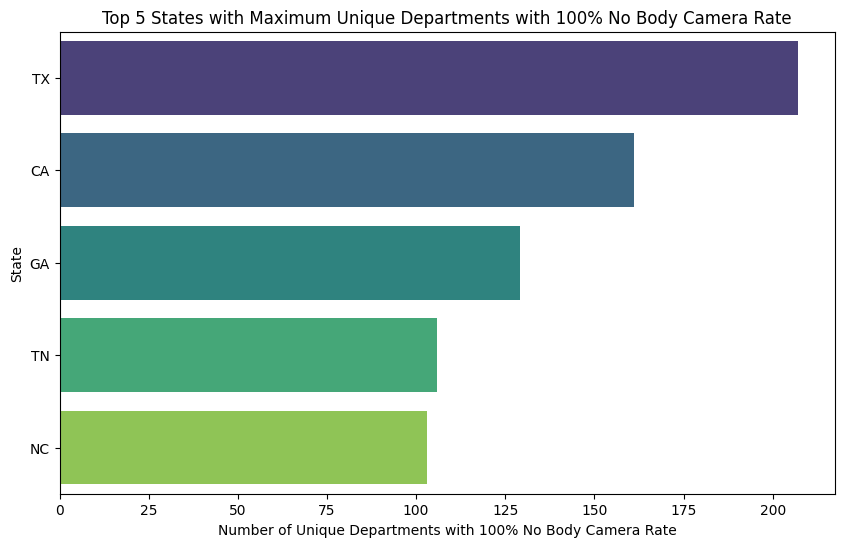

Top 5 States with Maximum Unique Departments:
state
TX    207
CA    161
GA    129
TN    106
NC    103
Name: police_department, dtype: int64


In [45]:
# Extract state from the 'police_department' column
df['state'] = df['police_department'].str.split(',').str[-1].str.strip()

# Filter incidents with no body camera usage
no_body_camera_incidents = df[df['body_camera'] == False]

# Group by unique police department identifier and state, calculate the rate of incidents with no body camera
department_no_body_camera_rate = no_body_camera_incidents.groupby(['police_department', 'state'])['body_camera'].count() / df.groupby(['police_department', 'state'])['body_camera'].count()
print(department_no_body_camera_rate)
# Find departments with the highest rate (1.0)
highest_rate_departments = department_no_body_camera_rate[department_no_body_camera_rate == 1.0]

# Count the number of unique departments per state with the highest rate
max_departments_states = highest_rate_departments.reset_index().groupby('state')['police_department'].nunique()

# Get the top 5 states with the maximum number of unique departments
top_5_states = max_departments_states.nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_states.values, y=top_5_states.index, palette='viridis')
plt.title('Top 5 States with Maximum Unique Departments with 100% No Body Camera Rate')
plt.xlabel('Number of Unique Departments with 100% No Body Camera Rate')
plt.ylabel('State')
plt.show()

# Display the top 5 states and their corresponding number of unique departments
print('Top 5 States with Maximum Unique Departments:')
print(top_5_states)
